In [ ]:
# git clone yolov7 official github
!git clone https://github.com/WongKinYiu/yolov7.git

In [ ]:
#packages requirements
!pip install -r ./requirements.txt

In [ ]:
# !pip install opencv-python==4.6.0.66
# !pip list | grep opencv

###error-OpenCV is not working. 'cv2' has no attribute 'gapi_wip_gst_GStreamerPipeline' (most likely due to a circular import)#####
!pip install "opencv-python-headless<4.3"

In [ ]:
!pip install coremltools
!pip install --upgrade setuptools pip --user
!pip install nvidia-pyindex
!pip install onnx_graphsurgeon
!pip install onnx 
!pip install onnxruntime
!pip install --ignore-installed PyYAML

!pip install pycuda
!pip install protobuf<4.21.3
!pip install onnxruntime
!pip install onnx>=1.9.0
!pip install onnx-simplifier>=0.3.6 --user
!pip install scikit-learn==0.19.2
!pip3 install colored

In [24]:
!pip list | grep onnx
# !pip3 install onnx==1.9.0

onnx                          1.9.0
onnx-graphsurgeon             0.3.20
onnx-simplifier               0.4.8
onnxruntime                   1.12.1
onnxruntime-gpu               1.12.1

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip list | grep scikit-learn

scikit-learn                  0.19.2

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


# Ubuntu Version

In [13]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.2 LTS
Release:	20.04
Codename:	focal


# TensorRT version 8.0.1

In [3]:
!python3 -c 'import tensorrt; print("TensorRT version: {}".format(tensorrt.__version__))'

TensorRT version: 8.0.1.6


In [2]:
!pip list | grep tensorrt

tensorrt                      8.0.1.6


In [4]:
# !dpkg -i ./tensorrt8.0.1/nv-tensorrt-repo-ubuntu2004-cuda11.3-trt8.0.1.6-ga-20210626_1-1_amd64.deb
#tensorrt8.0.1
import tensorrt as trt

In [5]:
import cv2
from PIL import Image
import pycuda.autoinit
import pycuda.driver as cuda
import numpy as np
import cv2
import netron

In [6]:
import sys
import torch
print(f"Python version: {sys.version}, {sys.version_info} ")
print(f"Pytorch version: {torch.__version__} ")

Python version: 3.8.10 | packaged by conda-forge | (default, May 11 2021, 07:01:05) 
[GCC 9.3.0], sys.version_info(major=3, minor=8, micro=10, releaselevel='final', serial=0) 
Pytorch version: 1.10.0a0+3fd9dcf 


In [ ]:
!nvidia-smi -q

# Driver Version                            : 510.85.02
# CUDA Version                              : 11.6
# Product Name                          : NVIDIA GeForce GTX 1080 Ti
#     Product Brand                         : GeForce
#     Product Architecture                  : Pascal
#         FB Memory Usage
#         Total                             : 11264 MiB

In [1]:
!nvidia-smi

Wed Sep  7 13:58:45 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.85.02    Driver Version: 510.85.02    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
|  0%   52C    P8    15W / 250W |   5140MiB / 11264MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
|  0%   

In [ ]:
# Download trained weights
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-tiny.pt

In [ ]:
# trt 변환 없이 일반 inference
!python detect.py --weights ./yolov7-tiny.pt --conf 0.25 --img-size 640 --source inference/images/horses.jpg

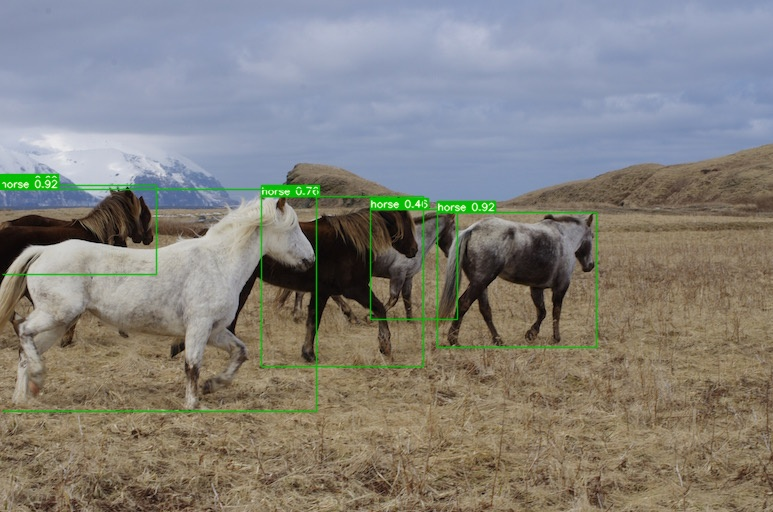

In [5]:
Image.open('./runs/detect/exp/horses.jpg')

# Batch 1 onnx - yolov7-tiny_1.onnx

In [ ]:
# .pt file to onnx (export.py: link: https://github.com/WongKinYiu/yolov7/blob/main/export.py)
!python export.py --weights ./yolov7-tiny.pt --device=0 --grid --simplify --include-nms
#--grid 'export Detect() layer grid'
#'--simplify' 'simplify onnx model'
#'--include-nms' 'export end2end onnx': 'EfficientNMS_TRT' of NMS Plugins

# Batch 1, 2 onnx - yolov7.onnx
    - batch size가 더 커지면 out of memory!!! (확인이 필요하다!)

In [ ]:
# yolov7
!python export.py --weights ./yolov7.pt --batch-size=3 --grid --device=0 --fp16 --simplify --include-nms #이미 simplify가 있다.

# Visualization of onnx - netron

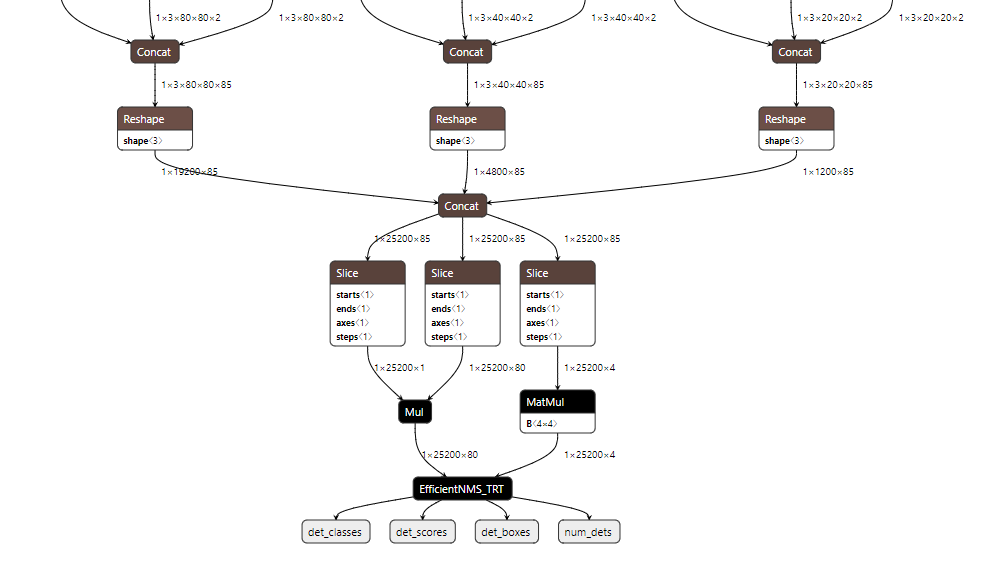

# Batch 16 onnx - yolov7-tiny_16.onnx

In [ ]:
# tiny
!python export.py --weights ./yolov7-tiny.pt --batch-size=16 --device=0,1 --grid --simplify --include-nms #이미 simplify가 있다.

## - onnx-simplifier: onnx 모델 간소화 (--simplify)
    - 모델 마다 간소화되는 부분이 많을 수도 있고, 적을 수도 있다.

In [4]:
!pip3 install onnx-simplifier

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [5]:
!python3 -m onnxsim ./yolov7-tiny_1.onnx ./yolov7-tiny_1_sim.onnx

Simplifying...
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/conda/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/root/.local/lib/python3.8/site-packages/onnxsim/__main__.py", line 5, in <module>
    main()
  File "/root/.local/lib/python3.8/site-packages/onnxsim/onnx_simplifier.py", line 430, in main
    model_opt, check_ok = simplify(
  File "/root/.local/lib/python3.8/site-packages/onnxsim/onnx_simplifier.py", line 184, in simplify
    model_opt_bytes = C.simplify(
RuntimeError: Field 'shape' of 'type' is required but missing.


# Visualization of onnx - netron

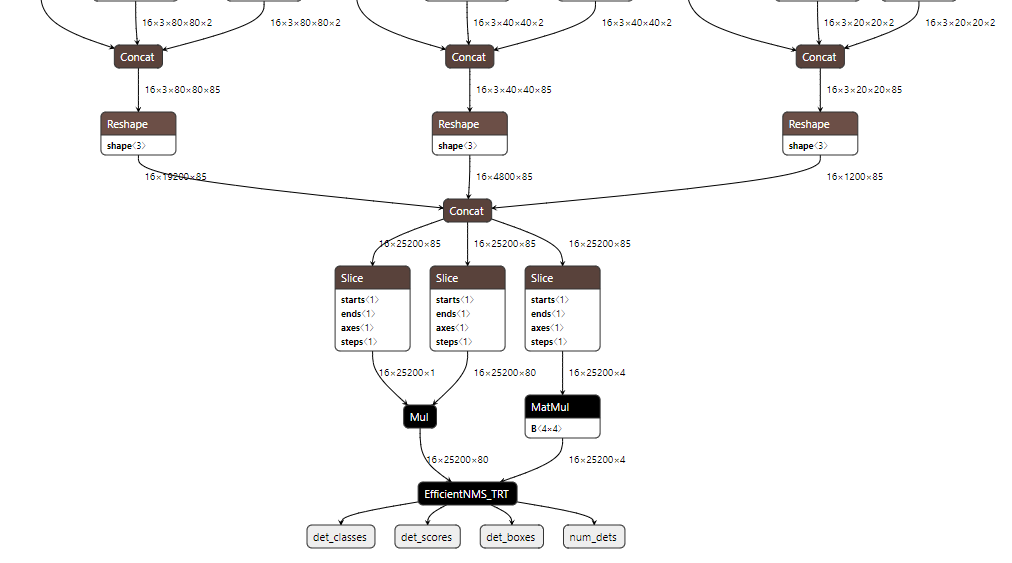

# Dynamic Batch onnx - yolov7-tiny_dynamic.onnx
    - input size : [batch, 3, 640, 640]
        *tensorrt7버전부터는 dynamic batch를 사용할 수 있다.

In [ ]:
#if end2end, output [num_det, det_boxes, det_scores, det_classes]
#if max-wh is None(default), it's for tensorrt nms, but int, for onnx-runtime nms
### if end2end and include-nms, duplicate output name?? so, graph has cycle?? error!!

!python export.py --weights ./hb/last.pt --dynamic-batch --grid --device=1 --fp16 --simplify --include-nms

# Visualization of onnx - netron

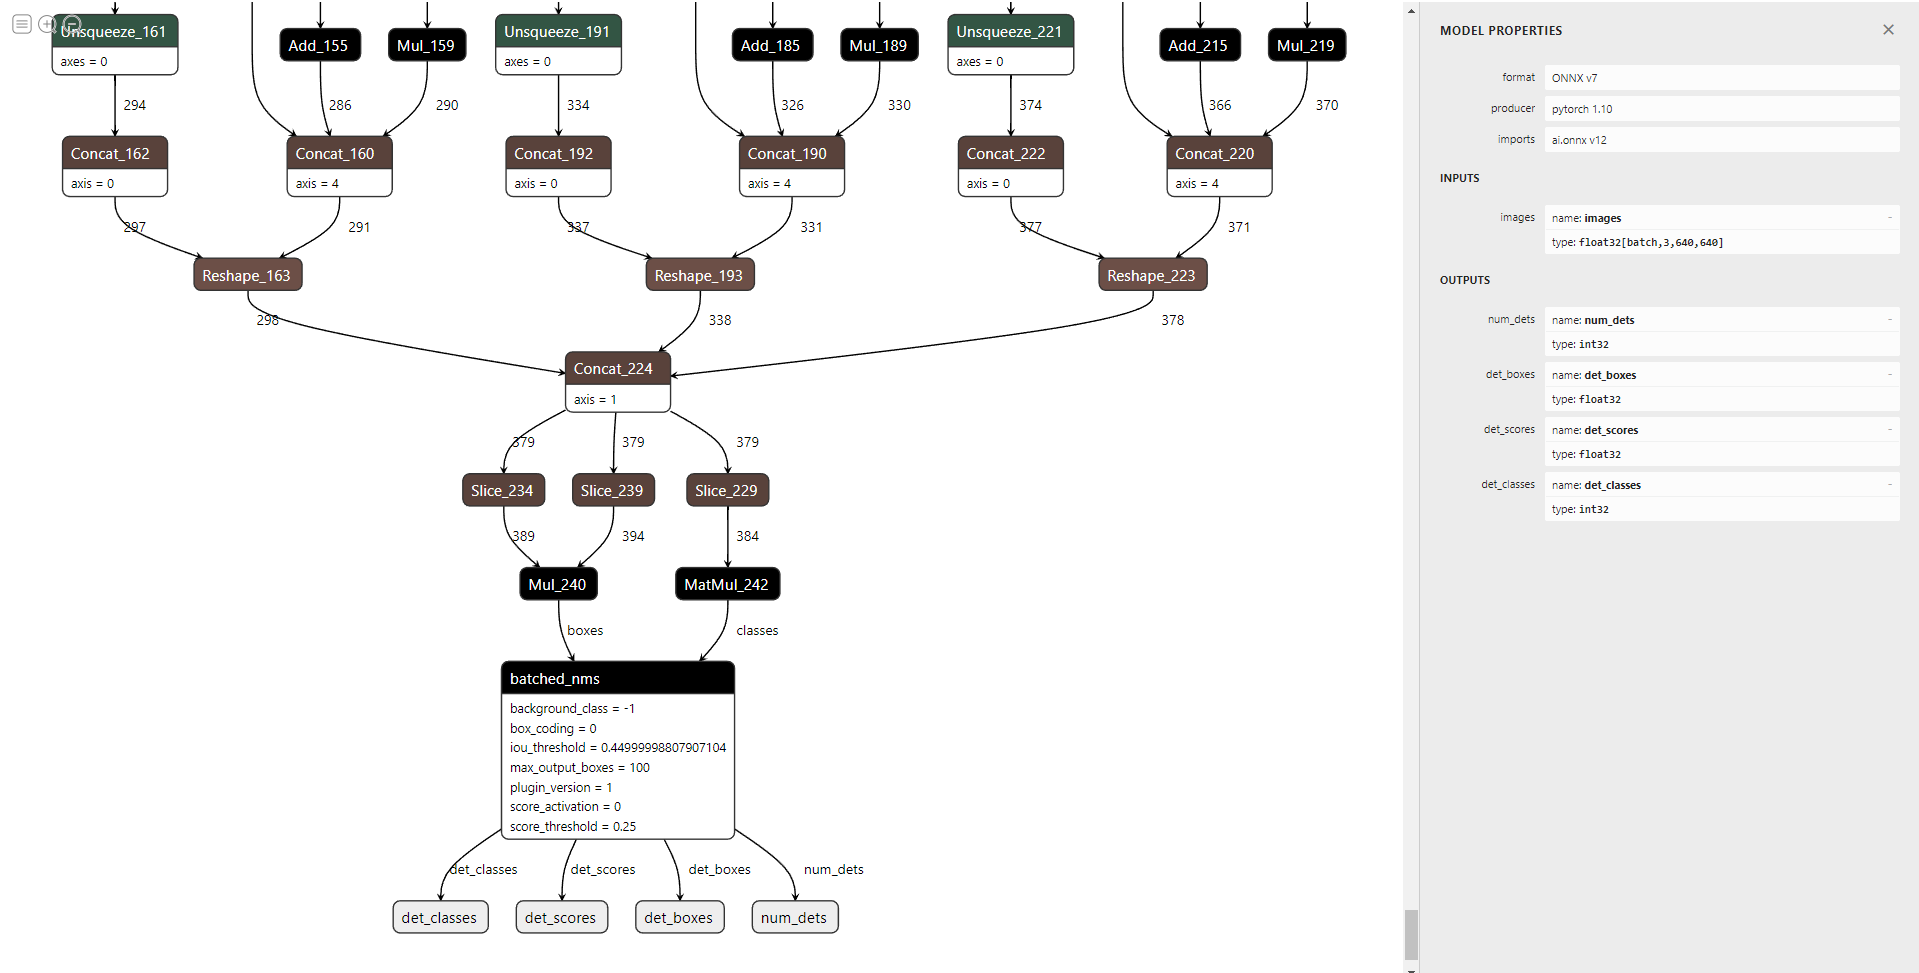

# Dynamic Batch onnx - yolov7_dynamic.onnx
    - input size : [batch, 3, 640, 640]
        *tensorrt7버전부터는 dynamic batch를 사용할 수 있다.

In [ ]:
#if end2end, output [num_det, det_boxes, det_scores, det_classes]
#if max-wh is None(default), it's for tensorrt nms, but int, for onnx-runtime nms
### if end2end and include-nms, duplicate output name?? so, graph has cycle?? error!!

!python export.py --weights ./yolov7.pt --dynamic-batch --grid --device=1 --fp16 --simplify --include-nms

# Visualization of onnx - netron

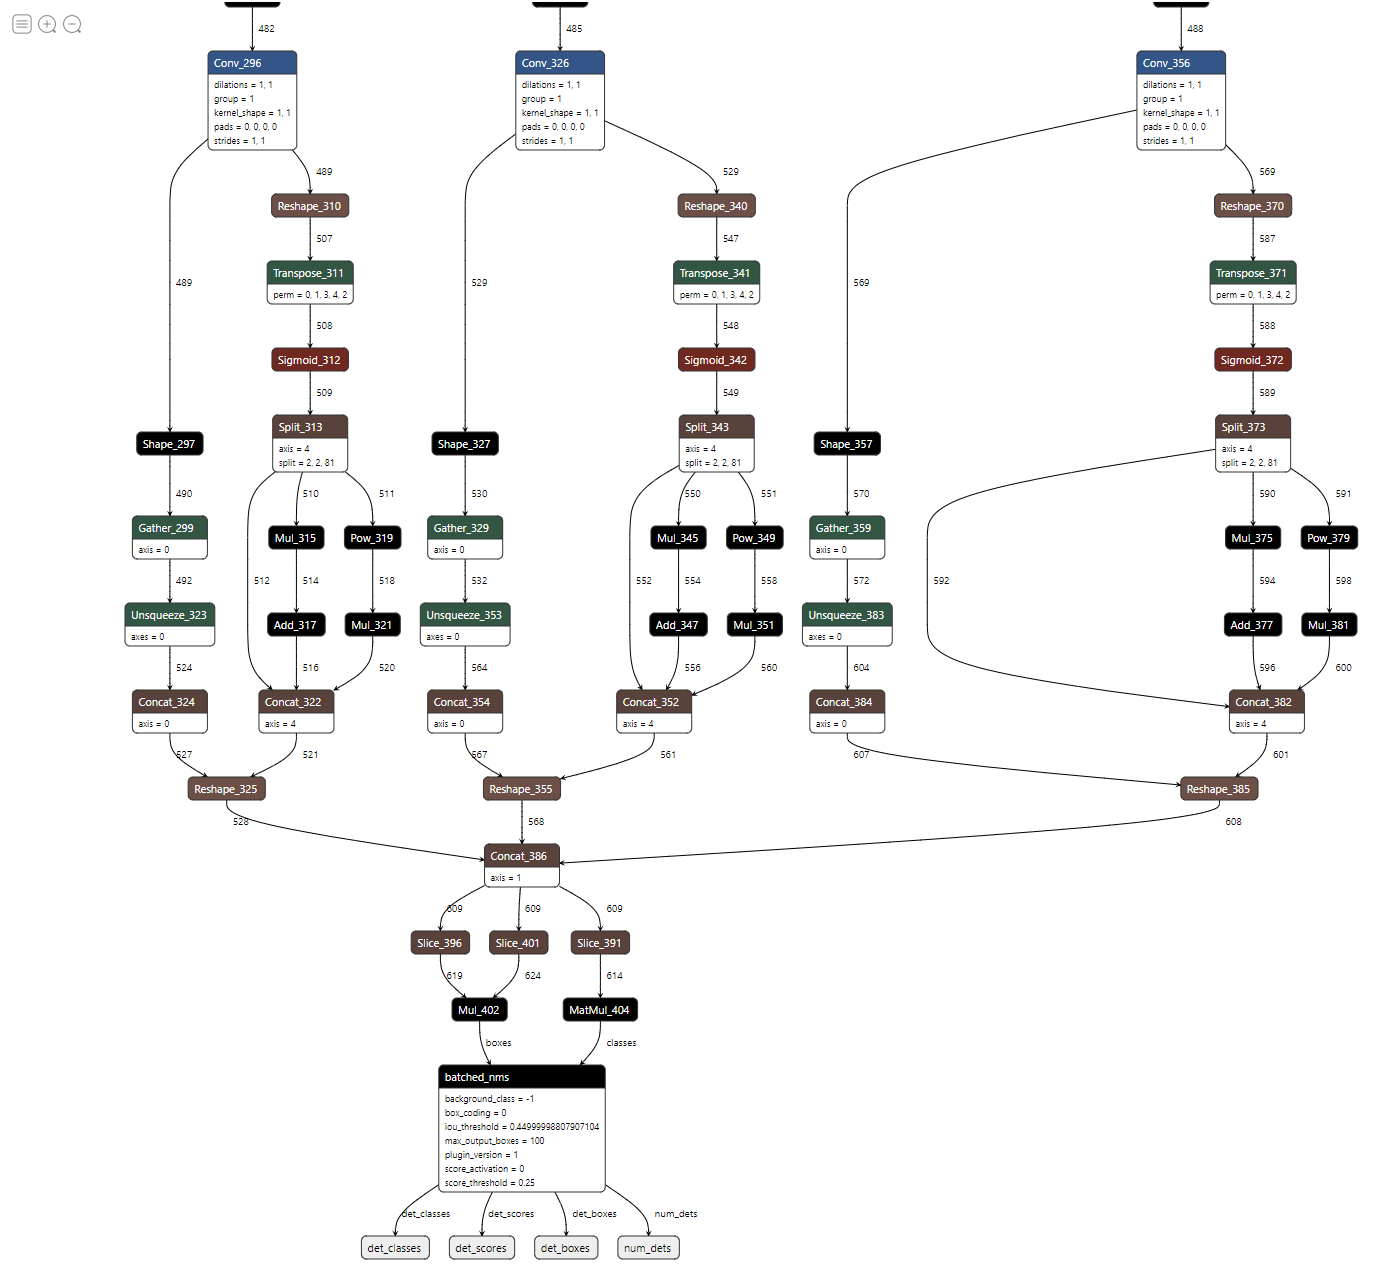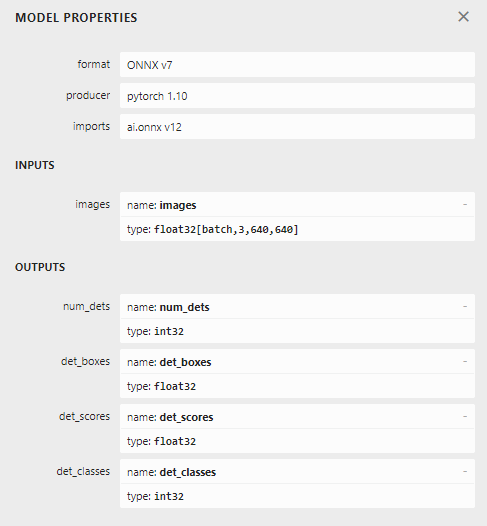

-----------------------

-----------------------

# tensorrt setup

## 1. tensorrt 8.0.1.6 tar 압축 풀기

In [ ]:
!tar xzvf ./TensorRT-8.0.1.6.Ubuntu-20.04.aarch64-gnu.cuda-11.3.cudnn8.2.tar.gz

## 2. lib 폴더 환경 변수 path로 설정
    If not --> error: 환경 변수를 설정하지 않으면 libnvinfer.so파일을 찾을 수 없다는 에러가 발생한다.
    - 고정: ~/.bashrc에 export (tensorrt lib path)를 추가
    - 일시: 여러 버전 사용시, terminal에 export (tensorrt lib path)로 해당 terminal의 창에 대해서만 환경 변수를 설정

In [15]:
pwd

'/home/yolov7'

In [18]:
!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/home/yolov7/TensorRT-8.0.1.6/lib/

## 3. (Local Down) Python 패캐지 설치
    1. cd TensorRT-${version}/python
    2.(python 2.x) sudo pip2 install tensorrt-*-cp27-none-linux_x86_64.whl
    2'.(python 3.x) sudo pip3 install tensorrt-*-cp3x-none-linux_x86_64.whl

In [20]:
!pip3 install ./TensorRT-8.0.1.6/python/tensorrt-8.0.1.6-cp36-none-linux_aarch64.whl

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
ERROR: tensorrt-8.0.1.6-cp36-none-linux_aarch64.whl is not a supported wheel on this platform.


## 4. (Local Down) UFF 패캐지 설치
    1. cd TensorRT-${version}/uff
    2.(python 2.x) sudo pip2 install uff-0.6.5-py2.py3-none-any.whl
    2'.(python 3.x) sudo pip3 install uff-0.6.5-py2.py3-none-any.whl

In [ ]:
!pip3 install ./TensorRT-8.0.1.6/uff/uff-0.6.9-py2.py3-none-any.whl

## 5. (Local Down) graphsurgeon 패캐지 설치
    1. cd TensorRT-${version}/graphsurgeon
    2.(python 2.x) sudo pip2 install graphsurgeon-0.4.1-py2.py3-none-any.whl
    2'.(python 3.x) sudo pip3 install graphsurgeon-0.4.1-py2.py3-none-any.whl

In [22]:
!pip3 install ./TensorRT-8.0.1.6/graphsurgeon/graphsurgeon-0.4.5-py2.py3-none-any.whl

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Processing ./TensorRT-8.0.1.6/graphsurgeon/graphsurgeon-0.4.5-py2.py3-none-any.whl
graphsurgeon is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


## 6. /usr/src/tensorrt/samples 에서 make 하여 빌드하기
    - 빌드가 완료되면 /workspace/tensorrt/bin에 실행파일이 생성됨

In [ ]:
!cd ./TensorRT-8.0.1.6/samples/ && make

# trtexec API를 이용한 trt 변환
    - batch inference 가능!
    - 아래 셀 trtexec --help images

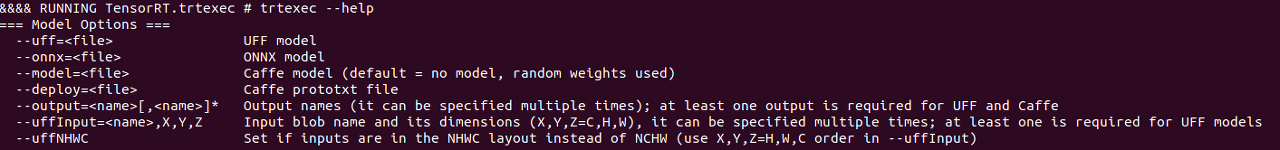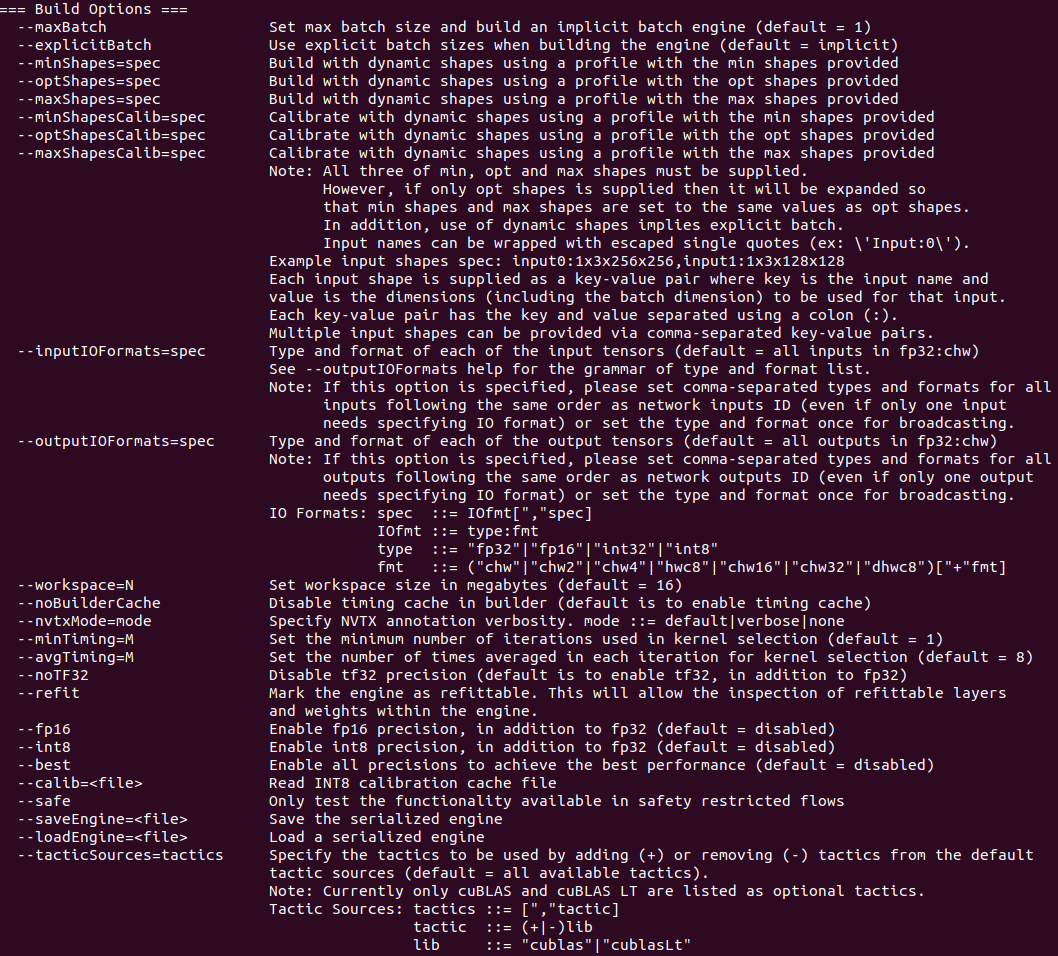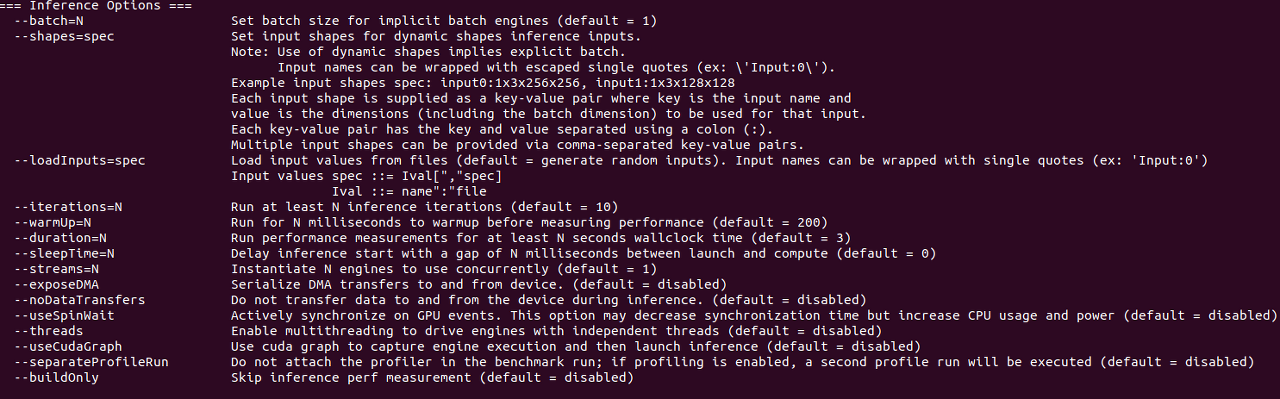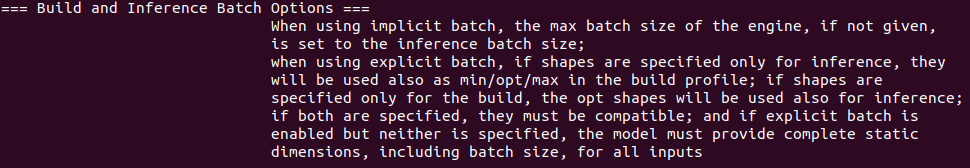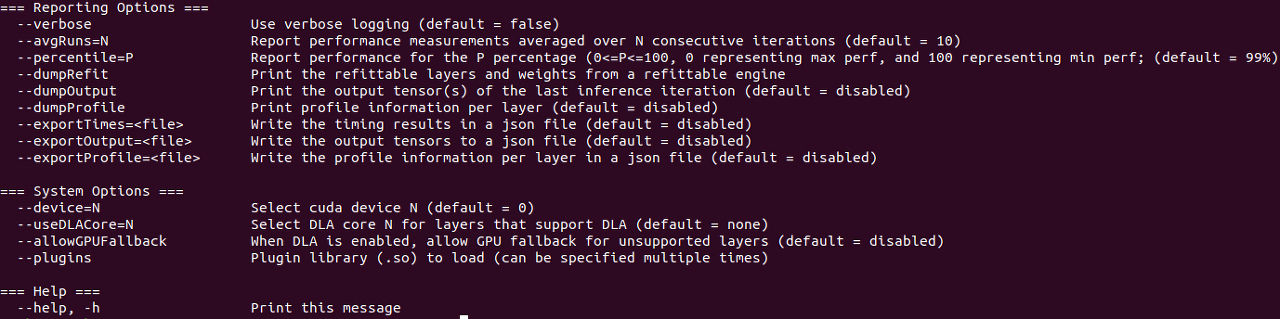

In [ ]:
!./TensorRT-8.0.1.6/bin/trtexec --help

---

# batch 1-8-64 trt - yolov7-tiny_8-fp16

In [ ]:
!nvidia-smi

Wed Sep 14 16:04:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.85.02    Driver Version: 510.85.02    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| 30%   48C    P5    25W / 250W |      0MiB / 11264MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 29%   

In [ ]:
!./TensorRT-8.0.1.6/bin/trtexec --onnx=./hb/last.onnx \
                                --explicitBatch \
                                --saveEngine=./hb/trt/yolov7_final_last.trt \
                                --minShapes=input_ids:1x3x640x640,attention_mask:1x3x640x640,token_type_ids:1x3x640x640 \
                                --optShapes=input_ids:8x3x640x640,attention_mask:8x3x640x640,token_type_ids:8x3x640x640 \
                                --maxShapes=input_ids:64x3x640x640,attention_mask:64x3x640x640,token_type_ids:64x3x640x640 \
                                --workspace=10240 \
                                --fp16 \
                                --device=0

&&&& RUNNING TensorRT.trtexec [TensorRT v8001] # ./TensorRT-8.0.1.6/bin/trtexec --onnx=./hb/last.onnx --explicitBatch --saveEngine=./hb/trt/yolov7_final_last.trt --minShapes=input_ids:1x3x640x640,attention_mask:1x3x640x640,token_type_ids:1x3x640x640 --optShapes=input_ids:8x3x640x640,attention_mask:8x3x640x640,token_type_ids:8x3x640x640 --maxShapes=input_ids:64x3x640x640,attention_mask:64x3x640x640,token_type_ids:64x3x640x640 --workspace=10240 --fp16 --device=0
[10/26/2022-08:21:56] [I] === Model Options ===
[10/26/2022-08:21:56] [I] Format: ONNX
[10/26/2022-08:21:56] [I] Model: ./hb/last.onnx
[10/26/2022-08:21:56] [I] Output:
[10/26/2022-08:21:56] [I] === Build Options ===
[10/26/2022-08:21:56] [I] Max batch: explicit
[10/26/2022-08:21:56] [I] Workspace: 10240 MiB
[10/26/2022-08:21:56] [I] minTiming: 1
[10/26/2022-08:21:56] [I] avgTiming: 8
[10/26/2022-08:21:56] [I] Precision: FP32+FP16
[10/26/2022-08:21:56] [I] Calibration: 
[10/26/2022-08:21:56] [I] Refit: Disabled
[10/26/2022-08:21:

# batch Test

## 1. batch 1

In [ ]:
!./TensorRT-8.0.1.6/bin/trtexec --loadEngine=./yolov7-tiny_8-fp16.trt \
                                --shapes=input_ids:input_ids:1x3x640x640,attention_mask:1x3x640x640,token_type_ids:1x3x640x640 \
                                --warmUp=20 \
                                --iterations=200

## 2. batch 8

In [ ]:
!./TensorRT-8.0.1.6/bin/trtexec --loadEngine=./yolov7-tiny_8-fp16.trt \
                                --shapes=input_ids:input_ids:8x3x640x640,attention_mask:8x3x640x640,token_type_ids:8x3x640x640 \
                                --warmUp=20 \
                                --iterations=200

## 3. batch 16

In [ ]:
!./TensorRT-8.0.1.6/bin/trtexec --loadEngine=./yolov7-tiny_8-fp16.trt \
                                --shapes=input_ids:input_ids:16x3x640x640,attention_mask:16x3x640x640,token_type_ids:16x3x640x640 \
                                --warmUp=20 \
                                --iterations=200

## 4. batch 32

In [ ]:
!./TensorRT-8.0.1.6/bin/trtexec --loadEngine=./yolov7-tiny_8-fp16.trt \
                                --shapes=input_ids:input_ids:32x3x640x640,attention_mask:32x3x640x640,token_type_ids:32x3x640x640 \
                                --warmUp=20 \
                                --iterations=200

## 5. batch 64

In [ ]:
!./TensorRT-8.0.1.6/bin/trtexec --loadEngine=./yolov7-tiny_8-fp16.trt \
                                --shapes=input_ids:input_ids:64x3x640x640,attention_mask:64x3x640x640,token_type_ids:64x3x640x640 \
                                --warmUp=20 \
                                --iterations=200

## 6. batch 128

In [ ]:
!./TensorRT-8.0.1.6/bin/trtexec --loadEngine=./yolov7-tiny_8-fp16.trt \
                                --shapes=input_ids:input_ids:128x3x640x640,attention_mask:128x3x640x640,token_type_ids:128x3x640x640 \
                                --warmUp=20 \
                                --iterations=200

## Dataloader by batch 16

In [16]:
import torch
import random
import torch.utils.data as data
import numpy as np
import cv2

def file_load(txt_path):
    
    data_path = []
    f = open(txt_path,'r')
    while True:
        line = f.readline()
        if not line: break
        data_path.append(line[:-1])
    f.close()
    return data_path

class CoCoDataset(data.Dataset):
    def __init__(self, txt_path):
        super(CoCoDataset, self).__init__()
        random.shuffle
#         """
#         opt_data : 'train', 'validation'
        
#         """
        self.file_list = file_load(txt_path)
        # y = pd.read_csv('audio_data/train_answer.csv', index_col=0)
        # self.y = y.values
        
    def __getitem__(self, index):
        
        x = cv2.imread(f'./coco{self.file_list[index][1:]}')
        self.x_data = torch.from_numpy(x).float()
        # self.y_data = torch.from_numpy(self.y[index]).float()
        return self.x_data #, self.y_data

    def __len__(self):
        return len(self.file_list)

In [17]:
coco = CoCoDataset(txt_path='./coco/val2017.txt')
for i, d in enumerate(coco):
    print(d.size())
    if i >= 0:
        break

torch.Size([640, 480, 3])


In [20]:
# drop_last: 마지막 배치는 사용하지 말자.
test_loader = data.DataLoader(dataset=coco, batch_size=16, drop_last=True,collate_fn=_collate_fn)

In [19]:
# we need select the way to prevent dynamic input size from raising error
## 1.padding
## 2.resize

def _collate_fn(batch):
    
    """
    Args:
        batch: list, len(batch) = 16.
    Returns:
        x_tensor : B, C, H, W ; tensor
        
    ex)
    torch.Size([640, 480, 3])
    torch.Size([479, 640, 3])
    """
    x_tensor=[]
    y_tensor=[]
    for img in batch:
        img = np.asarray(img)
        img = cv2.resize(img, (640, 480), cv2.INTER_CUBIC)
        x = torch.from_numpy(img)
        x_tensor.append(x)
 
    return x_tensor

In [29]:
def padding(img, set_size):
    
    '''
    set_size : tuple, (width, height)
    '''
    
#     try:
#         h,w,c=img.shape
#     except:
#         print('파일 확인 후 다시 시작하세요.')
#         raise
        
#     if h < w:
#         new_width = set_size[0]
#         new_height = int(new_width * (h/w))
#     else:
#         new_height = set_size[1]
#         new_width = int(new_height * (w/h))

#     if max(h, w) < set_size:
#         img = cv2.resize(img, (new_width, new_height), cv2.INTER_CUBIC)
#     else:
#         img = cv2.resize(img, (new_width, new_height), cv2.INTER_AREA)

    try:
        h,w,c = img.shape
    except:
        print('파일을 확인후 다시 시작하세요.')
        raise

    delta_w = set_size[0] - w
    delta_h = set_size[1] - h
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    new_img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

    return new_img

In [21]:
for i, batch in enumerate(test_loader):
    print(len(batch))
    if i >= 0:
        break

16


## batch 16 .trt inference test 

In [ ]:
# convert input data to byte type
list(map(lambda x : x.to_bytes(4, byteorder="little"), batch))

---

# batch 1-8-64 trt - yolov7_8-fp16.trt

In [ ]:
# build tensorrt engine from onnx : --buildOnly

!./TensorRT-8.0.1.6/bin/trtexec --onnx=./yolov7_dynamic_fp16.onnx \
                                --explicitBatch \
                                --saveEngine=./yolov7_8-fp16.trt \
                                --minShapes='input':1x3x640x640 \
                                --optShapes='input':8x3x640x640 \
                                --maxShapes='input':64x3x640x640 \
                                --workspace=10240 \
                                --fp16 \
                                --device=0 \
                                --buildOnly

In [ ]:
### test ###
!./TensorRT-8.0.1.6/bin/trtexec --onnx=./yolov7_dynamic_fp16.onnx \
                                --explicitBatch \
                                --saveEngine=./yolov7_8-fp16.trt \
                                --minShapes=input:1x3x640x640 \
                                --optShapes=input:16x3x640x640 \
                                --maxShapes=input:32x3x640x640 \
                                --shapes=input:5x3x640x640 \
                                --workspace=10240 \
                                --fp16 \
                                --device=0

# 조합을 찾기 : batch/streams below 2 ms that maximizes the throughput:
#--streams=N                 Instantiate N engines to use concurrently (default = 1)

# batch Test

## 1. batch 1

In [ ]:
!./TensorRT-8.0.1.6/bin/trtexec --loadEngine=./yolov7_8-fp16.trt \
                                --shapes='input':1x3x640x640 \
                                --warmUp=20 \
                                --iterations=200 \
                                --workspace=10240 \
                                --fp16 \
                                --device=1

## 2. batch 8

In [ ]:
!./TensorRT-8.0.1.6/bin/trtexec --loadEngine=./yolov7_8-fp16.trt \
                                --shapes='input':8x3x640x640 \
                                --warmUp=200 \
                                --iterations=2000 \
                                --workspace=10240 \
                                --fp16 \
                                --device=1

In [ ]:
# error
!./TensorRT-8.0.1.6/bin/trtexec --loadEngine=./yolov7_8-fp16.trt \
                                --maxBatch=8 \
                                --batch=8 \
                                --warmUp=200 \
                                --iterations=2000 \
                                --workspace=10240 \
                                --fp16 \
                                --device=1

## 3. batch 16

In [ ]:
!./TensorRT-8.0.1.6/bin/trtexec --loadEngine=./yolov7_8-fp16.trt \
                                --shapes='input':16x3x640x640 \
                                --warmUp=200 \
                                --iterations=2000 \
                                --workspace=10240 \
                                --fp16 \
                                --device=1

## 4. batch 32

In [ ]:
!./TensorRT-8.0.1.6/bin/trtexec --loadEngine=./yolov7_8-fp16.trt \
                                --shapes='input':32x3x640x640 \
                                --warmUp=20 \
                                --iterations=200 \
                                --workspace=10240 \
                                --fp16 \
                                --device=1

## 5. batch 64

In [ ]:
!./TensorRT-8.0.1.6/bin/trtexec --loadEngine=./yolov7_8-fp16.trt \
                                --shapes='input':64x3x640x640 \
                                --warmUp=200 \
                                --iterations=2000 \
                                --workspace=10240 \
                                --fp16 \
                                --device=1

# image batch test 
    - Dataloader by batch 16
    - --loadInputs='input0:./coco/images/dat/input0.dat,input1:./coco/images/dat/input1.dat

#### Dataloader

In [124]:
import torch
import random
import torch.utils.data as data
import numpy as np
import cv2

def file_load(txt_path):
    
    data_path = []
    f = open(txt_path,'r')
    while True:
        line = f.readline()
        if not line: break
        data_path.append(line[:-1])
    f.close()
    return data_path

class CoCoDataset(data.Dataset):
    def __init__(self, txt_path):
        super(CoCoDataset, self).__init__()
        random.shuffle
#         """
#         opt_data : 'train', 'validation'
        
#         """
        self.file_list = file_load(txt_path)
        # y = pd.read_csv('audio_data/train_answer.csv', index_col=0)
        # self.y = y.values
        
    def __getitem__(self, index):
        
        x = cv2.imread(f'./coco{self.file_list[index][1:]}')
        self.x_data = torch.from_numpy(x).float()
        # self.y_data = torch.from_numpy(self.y[index]).float()
        return self.x_data #, self.y_data

    def __len__(self):
        return len(self.file_list)

In [125]:
coco = CoCoDataset(txt_path='./coco/val2017.txt')
for i, d in enumerate(coco):
    print(d.size())
    if i >= 0:
        break

torch.Size([640, 480, 3])


In [128]:
# drop_last: 마지막 배치는 사용하지 말자.
test_loader = data.DataLoader(dataset=coco, batch_size=16, drop_last=True,collate_fn=_collate_fn)

In [127]:
# we need select the way to prevent dynamic input size from raising error
## 1.padding
## 2.resize

def _collate_fn(batch):
    
    """
    Args:
        batch: list, len(batch) = 16.
    Returns:
        x_tensor : B, C, H, W ; tensor
        
    ex)
    torch.Size([640, 480, 3])
    torch.Size([479, 640, 3])
    """
    x_tensor=[]
    y_tensor=[]
    for img in batch:
        img = np.asarray(img)
        img = cv2.resize(img, (640, 640), cv2.INTER_CUBIC)
        x = torch.from_numpy(img)
        x_tensor.append(x)
 
    return x_tensor

In [29]:
def padding(img, set_size):
    
    '''
    set_size : tuple, (width, height)
    '''
    
#     try:
#         h,w,c=img.shape
#     except:
#         print('파일 확인 후 다시 시작하세요.')
#         raise
        
#     if h < w:
#         new_width = set_size[0]
#         new_height = int(new_width * (h/w))
#     else:
#         new_height = set_size[1]
#         new_width = int(new_height * (w/h))

#     if max(h, w) < set_size:
#         img = cv2.resize(img, (new_width, new_height), cv2.INTER_CUBIC)
#     else:
#         img = cv2.resize(img, (new_width, new_height), cv2.INTER_AREA)

    try:
        h,w,c = img.shape
    except:
        print('파일을 확인후 다시 시작하세요.')
        raise

    delta_w = set_size[0] - w
    delta_h = set_size[1] - h
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    new_img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

    return new_img

In [132]:
for i, batch in enumerate(test_loader):
    print(len(batch))
    ### 1. 각각 1개씩 넣기 ###
    # batch0_list = list(map(lambda x: np.asarray(x.permute(2,0,1), dtype=np.float32), batch))
    
    ### (16, 3, 640, 640) ###
    test_batch = np.asarray(list(map(lambda x: np.asarray(x.permute(2,0,1), dtype=np.float32), batch)), dtype=np.float32) #torch (640,640,3) -> np.float32 (3,640,640)
    if i >= 0:
        break

16


#### 1. 각각 1개씩 읽기
    - 미리 저장 후 배치 개수만큼 읽어들이기

In [154]:
# dat folder에 test용 64개 이미지 fp32로 변환 저장
import PIL.Image
import os
dataset_path = './coco/images/val2017/'
save_path = './coco/images/dat/'
shape_info = 0
for i, img_path in enumerate(os.listdir(dataset_path)):
    img = PIL.Image.open(dataset_path+img_path).resize((640,640))
    data = np.asarray(img, dtype=np.float32).transpose(2,0,1)[np.newaxis, :]
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    data.tofile(f"{save_path}input{i}.dat")
    if i >= 64:
        shape_info = data.shape
        break

In [160]:
# shape name 만들기

### numpy 차원 추가하기 ###
# np.ones(shape_info).reshape((1,3,640,640)).shape
# np.expand_dims(np.ones(shape_info), axis=0).shape
# np.ones(shape_info)[np.newaxis, :].shape

shape_info

(1, 3, 640, 640)

In [163]:
# batch name 만들기

batch_num = 8
dat_path = "./coco/images/dat/"
shape = ''
batch = ''

for i in range(batch_num):
    shape_name = f"'input{i}':{shape_info[0]}x{shape_info[1]}x{shape_info[2]}x{shape_info[3]},"
    batch_name = f'input{i}:{dat_path}input{i}.dat,'
    if i >= batch_num-1:
        shape += shape_name[:-1]
        batch += batch_name[:-1]
    else:
        shape += shape_name
        batch += batch_name

print(shape)
print(batch)

'input0':1x3x640x640,'input1':1x3x640x640,'input2':1x3x640x640,'input3':1x3x640x640,'input4':1x3x640x640,'input5':1x3x640x640,'input6':1x3x640x640,'input7':1x3x640x640
input0:./coco/images/dat/input0.dat,input1:./coco/images/dat/input1.dat,input2:./coco/images/dat/input2.dat,input3:./coco/images/dat/input3.dat,input4:./coco/images/dat/input4.dat,input5:./coco/images/dat/input5.dat,input6:./coco/images/dat/input6.dat,input7:./coco/images/dat/input7.dat


In [ ]:
!./TensorRT-8.0.1.6/bin/trtexec --loadEngine=./yolov7_8-fp16.trt \
                                --shapes='input0':1x3x640x640,'input1':1x3x640x640,'input2':1x3x640x640,'input3':1x3x640x640,'input4':1x3x640x640,'input5':1x3x640x640,'input6':1x3x640x640,'input7':1x3x640x640 \
                                --loadInputs='input0:./coco/images/dat/input0.dat,input1:./coco/images/dat/input1.dat,input2:./coco/images/dat/input2.dat,input3:./coco/images/dat/input3.dat,input4:./coco/images/dat/input4.dat,input5:./coco/images/dat/input5.dat,input6:./coco/images/dat/input6.dat,input7:./coco/images/dat/input7.dat' \
                                --exportOutput='./output_16_3.json' \
                                --workspace=10240 \
                                --fp16 \
                                --device=1 \
                                --warmUp=200 \
                                --iterations=2000

#### 2. 한번에 list -> array 묶어서 읽어들이기

In [133]:
test_batch.shape

(16, 3, 640, 640)

##### *TensorRT expects to use as input (usually but not always float32) 

In [134]:
test_batch.tofile("./input_16.dat") #.dat file - raw binary buffer of dtype fp32

In [136]:
!./TensorRT-8.0.1.6/bin/trtexec --loadEngine=./yolov7_8-fp16.trt \
                                --shapes='input':16x3x640x640 \
                                --loadInputs='input:./input_16.dat' \
                                --exportOutput='./output_16.json' \
                                --workspace=10240 \
                                --fp16 \
                                --device=1 \
                                --warmUp=200 \
                                --iterations=2000

&&&& RUNNING TensorRT.trtexec [TensorRT v8001] # ./TensorRT-8.0.1.6/bin/trtexec --loadEngine=./yolov7_8-fp16.trt --shapes=input:16x3x640x640 --loadInputs=input:./input_16.dat --exportOutput=./output_16.json --workspace=10240 --fp16 --device=1 --warmUp=200 --iterations=2000
[09/16/2022-07:57:05] [I] === Model Options ===
[09/16/2022-07:57:05] [I] Format: *
[09/16/2022-07:57:05] [I] Model: 
[09/16/2022-07:57:05] [I] Output:
[09/16/2022-07:57:05] [I] === Build Options ===
[09/16/2022-07:57:05] [I] Max batch: explicit
[09/16/2022-07:57:05] [I] Workspace: 10240 MiB
[09/16/2022-07:57:05] [I] minTiming: 1
[09/16/2022-07:57:05] [I] avgTiming: 8
[09/16/2022-07:57:05] [I] Precision: FP32+FP16
[09/16/2022-07:57:05] [I] Calibration: 
[09/16/2022-07:57:05] [I] Refit: Disabled
[09/16/2022-07:57:05] [I] Sparsity: Disabled
[09/16/2022-07:57:05] [I] Safe mode: Disabled
[09/16/2022-07:57:05] [I] Restricted mode: Disabled
[09/16/2022-07:57:05] [I] Save engine: 
[09/16/2022-07:57:05] [I] Load engine: ./yo

# tensorrt-python API을 이용한 trt 변환방법
    - batch inference에 error issue

## SetUp - .onnx -> .trt - tensorrt-python.git

In [42]:
!git clone https://github.com/Linaom1214/tensorrt-python.git

Cloning into 'tensorrt-python'...
remote: Enumerating objects: 231, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 231 (delta 49), reused 46 (delta 14), pack-reused 126
Receiving objects: 100% (231/231), 76.89 MiB | 7.84 MiB/s, done.
Resolving deltas: 100% (104/104), done.


## Batch 1 trt - yolov7-tiny_1-fp16-nms.trt

In [8]:
# calib_batch_size if int8:
!python ./tensorrt-python/export.py -o ./yolov7-tiny_1.onnx -e ./yolov7-tiny_1-fp16-nms.trt -p fp16 --max_det=100 #["fp32", "fp16", "int"]

Namespace(calib_batch_size=1, calib_cache='./calibration.cache', calib_input=None, calib_num_images=5000, conf_thres=0.4, end2end=False, engine='./yolov7-tiny_1-fp16-nms.trt', iou_thres=0.5, max_det=100, onnx='./yolov7-tiny_1.onnx', precision='fp16', verbose=False, workspace=1)
[TensorRT] INFO: [MemUsageChange] Init CUDA: CPU +151, GPU +0, now: CPU 171, GPU 3954 (MiB)
[TensorRT] WARNING: onnx2trt_utils.cpp:362: Your ONNX model has been generated with INT64 weights, while TensorRT does not natively support INT64. Attempting to cast down to INT32.
[TensorRT] WARNING: onnx2trt_utils.cpp:390: One or more weights outside the range of INT32 was clamped
[TensorRT] INFO: No importer registered for op: EfficientNMS_TRT. Attempting to import as plugin.
[TensorRT] INFO: Searching for plugin: EfficientNMS_TRT, plugin_version: 1, plugin_namespace: 
[TensorRT] INFO: Successfully created plugin: EfficientNMS_TRT
Network Description
Input 'images' with shape (1, 3, 640, 640) and dtype DataType.FLOAT
O

## Batch 1 trt - yolov7_1-py-fp16.trt

In [ ]:
# calib_batch_size if int8:
!python ./tensorrt-python/export.py -o ./yolov7_1.onnx -e ./yolov7_1-py-fp16.trt -p fp16 --workspace=10 #["fp32", "fp16", "int"]

## Batch 2 trt - yolov7_2-py-fp16.trt

In [ ]:
# calib_batch_size if int8:
!python ./tensorrt-python/export.py -o ./yolov7_2.onnx -e ./yolov7_2-py-fp16.trt -p fp16 --workspace=10 #["fp32", "fp16", "int"]

## Batch 16 trt - yolov7-tiny_16-fp16-nms.trt

In [ ]:
# calib_batch_size if int8:
!python ./tensorrt-python/export.py -o ./yolov7-tiny_16_2.onnx -e ./yolov7-tiny_16_2-fp16-nms.trt -p fp16 --max_det=100 #["fp32", "fp16", "int8"]

## BaseEngine(Class)
   - build trt 

In [3]:
import  matplotlib.pyplot as plt

import tensorrt as trt
import pycuda.autoinit
import pycuda.driver as cuda
import numpy as np
import cv2
import os

class BaseEngine(object):
    def __init__(self, engine_path, imgsz=(640,640)):
        self.imgsz = imgsz
        self.mean = None
        self.std = None
        # self.class_names = [ 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
        #  'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        #  'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
        #  'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
        #  'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
        #  'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
        #  'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
        #  'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
        #  'hair drier', 'toothbrush' ]
        self.class_names = ['person', 'bicycle', 'bus', 'car', 'carrier','motorcycle', 'movable signage', 'truck', 'bollard', 'chair','potted plant', 'table', 'tree trunk', 'fire hydrant', 'pole']
        
        ####ICudaEngine(모델의 정보를 갖고 있음: 1. device_memory_size, 2.max_batch_size 3.num_bindings(I/O_bindings) 4.trt모델의 layer 개수)####
        logger = trt.Logger(trt.Logger.WARNING) 
        trt.init_libnvinfer_plugins(logger,'') #plugin 사용을 위한 초기화
        runtime = trt.Runtime(logger) #serialized ICudaEngine을 deserialize하기 위한 클래스 객체 (*serialize: 나중에 재사용하기 위한 포맷(.trt: bytestream으로 저장 됨.)으로 바꾸는 것 <-> 실행하기 위해 빌드)
        with open(engine_path, "rb") as f:
            serialized_engine = f.read()
        engine = runtime.deserialize_cuda_engine(serialized_engine) #trt 모델을 읽어 serialized한 ICudaEngine을 deserialize 한다.
        self.context = engine.create_execution_context() #ICudaEngine을 이용해 inference를 하기 위한 context class 생성.
        ####Setup I/O binding####
        #trt 모델의 input과 output 정보를 저장하고 이후 inference 시에 사용
        self.inputs, self.outputs, self.bindings = [], [], [] 
        self.stream = cuda.Stream()
        for binding in engine:
            print(f"binding:{binding}")
            size = trt.volume(engine.get_binding_shape(binding)) #binding의 shape에 따른 volume 할당 size
            print(f"shape:{engine.get_binding_shape(binding)}")
            dtype = trt.nptype(engine.get_binding_dtype(binding))
            host_mem = cuda.pagelocked_empty(size, dtype) 
            device_mem = cuda.mem_alloc(host_mem.nbytes) #해당 size에 따른 mem gpu 할당
            self.bindings.append(int(device_mem))
            if engine.binding_is_input(binding): # input
                self.inputs.append({'host': host_mem, 'device': device_mem})
            else: #output
                self.outputs.append({'host': host_mem, 'device': device_mem})
                
    def infer(self, img):
        # print(self.inputs[0]['host'], len(self.inputs[0]['host']))
        self.inputs[0]['host'] = np.ravel(img)
        # print(self.inputs, self.inputs[0], self.inputs[0]['host'])
        # transfer data to the gpu (host to device)
        for inp in self.inputs:
            cuda.memcpy_htod_async(inp['device'], inp['host'], self.stream)
        # run inference-single
        self.context.execute_async_v2(
            bindings=self.bindings,
            stream_handle=self.stream.handle)
        # fetch outputs from gpu (device to host)
        # print(f"output: {self.outputs}")
        for out in self.outputs:
            cuda.memcpy_dtoh_async(out['host'], out['device'], self.stream)
        # synchronize stream
        self.stream.synchronize()

        data = [out['host'] for out in self.outputs]
        # print(data)
        return data

###############
#     def infer_batch(self, images):
        
#         self.inputs[0]['host'] = [np.ravel(img) for img in images]
        
#         datas= []
#         # transfer data to the gpu (host to device)
#         for inp in self.inputs[0]['host']:
#             cuda.memcpy_htod_async(self.inputs[0]['device'], inp, self.stream)
#             # run inference-single
#             self.context.execute_async_v2(
#                 bindings=self.bindings,
#                 stream_handle=self.stream.handle)
#             # fetch outputs from gpu (device to host)
#             for out in self.outputs:
#                 cuda.memcpy_dtoh_async(self.inputs[0]['device'], out['device'], self.stream)
#             # synchronize stream
#             self.stream.synchronize()

#             data = [out['host'] for out in self.outputs]
#             datas.append(data)
            
#         return datas
##############

#     def inference(self, img_or_path=False, img=None, path=None, conf=0.5):
#         #추론 input을 path로 받을지 혹은 이미지(nd.array)로 받을지
#         if not img_or_path:
#             origin_img = cv2.imread(path)
#             origin_img = cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB)
#         else:
#             origin_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         img, ratio = preproc(origin_img, self.imgsz, self.mean, self.std) #preprocess
#         num, final_boxes, final_scores, final_cls_inds = self.infer(img) #infer() 
#         final_boxes = np.reshape(final_boxes, (-1, 4))
#         num = num[0]
#         if num >0:
#             final_boxes, final_scores, final_cls_inds = final_boxes[:num]/ratio, final_scores[:num], final_cls_inds[:num]
#             origin_img = vis(origin_img, final_boxes, final_scores, final_cls_inds,
#                              conf=conf, class_names=self.class_names)
#             print(final_scores)
#             print(final_cls_inds)
        
#         origin_img = cv2.cvtColor(origin_img, cv2.COLOR_RGB2BGR)                      
#         return origin_img
    
    def inference(self, img_or_path=False, img=None, path=None, conf=0.5):
        #추론 input을 path로 받을지 혹은 이미지(nd.array)로 받을지
        img_list = os.listdir(path)
        
        person_score = 0.0
        score_sum = 0.0
        object_num = 0
        person_num = 0
        num = 0
        
        for el in img_list:
            try:
                img_path = path + el
                if not img_or_path:
                    origin_img = cv2.imread(img_path)
                    origin_img = cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB)
                else:
                    origin_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img, ratio = preproc(origin_img, self.imgsz, self.mean, self.std) #preprocess
                num, final_boxes, final_scores, final_cls_inds = self.infer(img) #infer() 
                final_boxes = np.reshape(final_boxes, (-1, 4))
                num = num[0]
                if num >0:
                    final_boxes, final_scores, final_cls_inds = final_boxes[:num]/ratio, final_scores[:num], final_cls_inds[:num]
                for score, cls_index in zip(final_scores, final_cls_inds):
                    score_sum += float(score)
                    if cls_index == 0:
                        person_score += float(score)
                        person_num += 1
                        object_num += 1
                    else:
                        object_num += 1
                num += 1
                # print("{0}/{1}".format(num, len(img_list)))
            except:
                print("img error : ", img_path)
                break
        
        score_avg = score_sum / object_num
        person_score = person_score / person_num
        return score_avg, person_score


###################
#     def inference_batch(self, images, conf=0.25):
#         """
#         :param image: input images(list in dict: [np array])
#         """
#         images_out = []
        
#         for origin_img in images:
#             origin_img = cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB)
#             img, ratio = preproc(origin_img, self.imgsz, self.mean, self.std) #preprocess
#             images.append(img)
            
#         datas = self.infer_batch(images)
        
#         for data in datas:
#             num, final_boxes, final_scores, final_cls_inds = data #infer() 
#             final_boxes = np.reshape(final_boxes, (-1, 4))
#             num = num[0]
#             if num >0:
#                 final_boxes, final_scores, final_cls_inds = final_boxes[:num]/ratio, final_scores[:num], final_cls_inds[:num]
#                 origin_img = vis(image, final_boxes, final_scores, final_cls_inds,
#                                  conf=conf, class_names=self.class_names)
#             img_out = cv2.cvtColor(origin_img, cv2.COLOR_RGB2BGR)
#             images_out.append(img_out)
#         return images_out
#################

    def get_fps(self):
        
        ######warmup 20/ iter 200######
        # warmup
        import time
        img = np.ones((1,3,self.imgsz[0], self.imgsz[1]))
        img = np.ascontiguousarray(img, dtype=np.float32)
        for _ in range(20):
            _ = self.infer(img) #warmup
        
        #average
        t_sum = 0
        for _ in range(200):
            t_b = time.perf_counter()
            _ = self.infer(img)
            t_sum += (time.perf_counter() - t_b)
        average_t = t_sum / 200
        print(f"Average Latency: {average_t*1000} ms")
        print(f"Average Throughput: {round(1/average_t, 1)} fps")

def preproc(image, input_size, mean, std, swap=(2, 0, 1)):
    # image 1개씩 받아서 처리해주면 됨.
    
    if len(image.shape) == 3:
        padded_img = np.ones((input_size[0], input_size[1], 3)) * 114.0
    else:
        padded_img = np.ones(input_size) * 114.0
    img = np.array(image)
    r = min(input_size[0] / img.shape[0], input_size[1] / img.shape[1]) #640-imgsize에 맞춰주기
    
    resized_img = cv2.resize(
        img,
        (int(img.shape[1] * r), int(img.shape[0] * r)),
        interpolation=cv2.INTER_LINEAR,
    ).astype(np.float32) #resize by imgsize
    padded_img[: int(img.shape[0] * r), : int(img.shape[1] * r)] = resized_img

    padded_img = padded_img[:, :, ::-1]
    padded_img /= 255.0
    
    if mean is not None: #normalize
        padded_img -= mean
    if std is not None:
        padded_img /= std
    padded_img = padded_img.transpose(swap)
    padded_img = np.ascontiguousarray(padded_img, dtype=np.float32)
    return padded_img, r


_COLORS = np.array(
    [
        0.000, 0.447, 0.741,
        0.850, 0.325, 0.098,
        0.929, 0.694, 0.125,
        0.494, 0.184, 0.556,
        0.466, 0.674, 0.188,
        0.301, 0.745, 0.933,
        0.635, 0.078, 0.184,
        0.300, 0.300, 0.300,
        0.600, 0.600, 0.600,
        1.000, 0.000, 0.000,
        1.000, 0.500, 0.000,
        0.749, 0.749, 0.000,
        0.000, 1.000, 0.000,
        0.000, 0.000, 1.000,
        0.667, 0.000, 1.000,
        0.333, 0.333, 0.000,
        0.333, 0.667, 0.000,
        0.333, 1.000, 0.000,
        0.667, 0.333, 0.000,
        0.667, 0.667, 0.000,
        0.667, 1.000, 0.000,
        1.000, 0.333, 0.000,
        1.000, 0.667, 0.000,
        1.000, 1.000, 0.000,
        0.000, 0.333, 0.500,
        0.000, 0.667, 0.500,
        0.000, 1.000, 0.500,
        0.333, 0.000, 0.500,
        0.333, 0.333, 0.500,
        0.333, 0.667, 0.500,
        0.333, 1.000, 0.500,
        0.667, 0.000, 0.500,
        0.667, 0.333, 0.500,
        0.667, 0.667, 0.500,
        0.667, 1.000, 0.500,
        1.000, 0.000, 0.500,
        1.000, 0.333, 0.500,
        1.000, 0.667, 0.500,
        1.000, 1.000, 0.500,
        0.000, 0.333, 1.000,
        0.000, 0.667, 1.000,
        0.000, 1.000, 1.000,
        0.333, 0.000, 1.000,
        0.333, 0.333, 1.000,
        0.333, 0.667, 1.000,
        0.333, 1.000, 1.000,
        0.667, 0.000, 1.000,
        0.667, 0.333, 1.000,
        0.667, 0.667, 1.000,
        0.667, 1.000, 1.000,
        1.000, 0.000, 1.000,
        1.000, 0.333, 1.000,
        1.000, 0.667, 1.000,
        0.333, 0.000, 0.000,
        0.500, 0.000, 0.000,
        0.667, 0.000, 0.000,
        0.833, 0.000, 0.000,
        1.000, 0.000, 0.000,
        0.000, 0.167, 0.000,
        0.000, 0.333, 0.000,
        0.000, 0.500, 0.000,
        0.000, 0.667, 0.000,
        0.000, 0.833, 0.000,
        0.000, 1.000, 0.000,
        0.000, 0.000, 0.167,
        0.000, 0.000, 0.333,
        0.000, 0.000, 0.500,
        0.000, 0.000, 0.667,
        0.000, 0.000, 0.833,
        0.000, 0.000, 1.000,
        0.000, 0.000, 0.000,
        0.143, 0.143, 0.143,
        0.286, 0.286, 0.286,
        0.429, 0.429, 0.429,
        0.571, 0.571, 0.571,
        0.714, 0.714, 0.714,
        0.857, 0.857, 0.857,
        0.000, 0.447, 0.741,
        0.314, 0.717, 0.741,
        0.50, 0.5, 0
    ]
).astype(np.float32).reshape(-1, 3)


def vis(img, boxes, scores, cls_ids, conf=0.5, class_names=None):
    for i in range(len(boxes)):
        box = boxes[i]
        cls_id = int(cls_ids[i])
        score = scores[i]
        if score < conf:
            continue
        x0 = int(box[0])
        y0 = int(box[1])
        x1 = int(box[2])
        y1 = int(box[3])
        
        #class 별로 위의 색깔 표에 따라 다른 색깔로 bbox
        color = (_COLORS[cls_id % 80] * 255).astype(np.uint8).tolist()
        text = '{}:{:.1f}%'.format(class_names[cls_id], score * 100)
        txt_color = (0, 0, 0) if np.mean(_COLORS[cls_id % 80]) > 0.5 else (255, 255, 255)
        font = cv2.FONT_HERSHEY_SIMPLEX

        txt_size = cv2.getTextSize(text, font, 0.4, 1)[0]
        cv2.rectangle(img, (x0, y0), (x1, y1), color, 2)

        txt_bk_color = (_COLORS[cls_id % 80] * 255 * 0.7).astype(np.uint8).tolist()
        cv2.rectangle(
            img,
            (x0, y0 + 1),
            (x0 + txt_size[0] + 1, y0 + int(1.5 * txt_size[1])),
            txt_bk_color,
            -1
        )
        cv2.putText(img, text, (x0, y0 + txt_size[1]), font, 0.4, txt_color, thickness=1)

    return img

# Test - yolov7_tiny

## batch 1 .trt inference test

In [ ]:
pred = BaseEngine(engine_path='./hb/trt/yolov7_final.trt')
import os
img_dir = './coco/images/val2017/'
for img_path in os.listdir('./coco/images/val2017'):
    _ = pred.inference(img_dir + img_path)

In [ ]:
pred = BaseEngine(engine_path='./yolov7_1-py-fp16.trt')
origin_img = pred.inference(img_or_path=False, path='inference/images/horses.jpg')

In [ ]:
np.ravel(horse)

In [ ]:
horse = cv2.imread('./inference/images/horses.jpg')
bus = cv2.imread('./inference/images/bus.jpg')
# zidane = cv2.imread('inference/images/zidane.jpg')

batch_2 = [bus, horse]
# batch_3 = [zidane, bus, horse]

In [ ]:
plt.imshow(horse)

In [ ]:
pred = BaseEngine(engine_path='./yolov7_1-py-fp16.trt')
origin_img = pred.inference_batch(images=batch_2)

In [ ]:
for i, img in zip(range(self.batch_size), images):
            self.input.host[i] = np.ravel(img)

In [ ]:
pred.get_fps()

In [ ]:
import  matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(origin_img[:, :, ::-1])

## using trtexec build .trt - yolov7

### 1. path input

In [4]:
pred = BaseEngine(engine_path='./hb/trt/yolov7_final.trt')


score_avg, person_score = pred.inference(img_or_path=False, path='inference/fall/')
print('average score : ', score_avg)
print('person score : ', person_score)

[TensorRT] WARNING: The logger passed into createInferRuntime differs from one already provided for an existing builder, runtime, or refitter. TensorRT maintains only a single logger pointer at any given time, so the existing value, which can be retrieved with getLogger(), will be used instead. In order to use a new logger, first destroy all existing builder, runner or refitter objects.



binding:images
shape:(1, 3, 640, 640)
binding:num_dets
shape:(1, 1)
binding:det_boxes
shape:(1, 100, 4)
binding:det_scores
shape:(1, 100)
binding:det_classes
shape:(1, 100)
img error :  inference/fall/tb_img_hb0000007461.jpg
average score :  0.7970597024822555
person score :  0.7575515678373784


In [ ]:
pred.get_fps()

In [ ]:
import  matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(origin_img[:, :, ::-1])
plt.show()

### 2. img(nd.array) input

In [5]:
zidane = cv2.imread('inference/images/MP_SEL_001723.jpg')
zidane.shape

(640, 640, 3)

In [6]:
# zidane[np.newaxis, :].shape
origin_img = pred.inference(img_or_path=True, img=zidane)
print(pred)

In [7]:
pred.get_fps()

Average Latency: 14.229378822492436 ms
Average Throughput: 70.3 fps


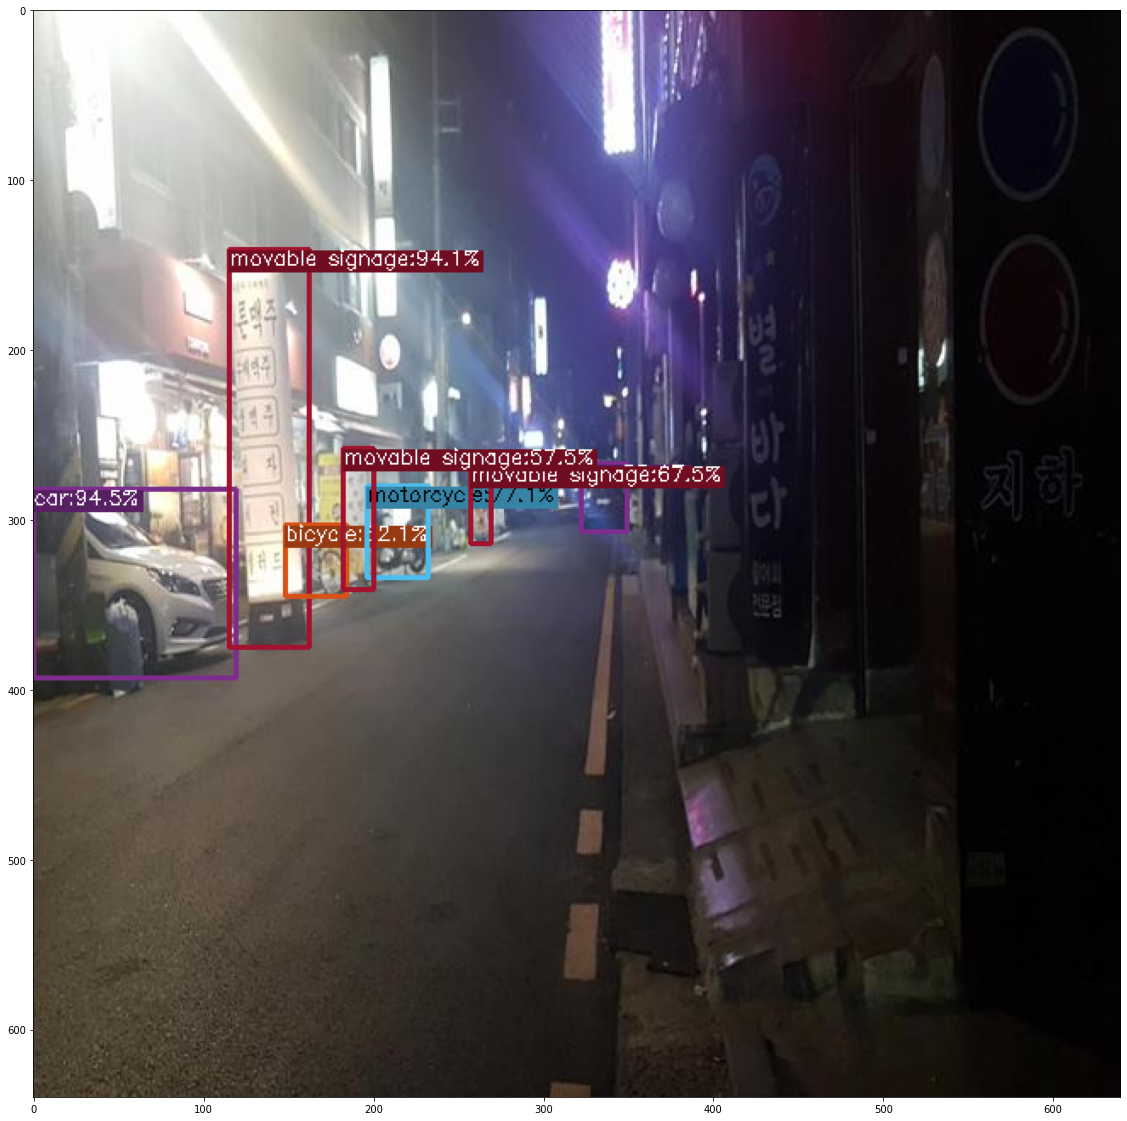

In [8]:
import  matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(origin_img[:, :, ::-1])
plt.show()

## trt.py - 1 batch

In [6]:
!python ./tensorrt-python/trt.py -e ./yolov7-tiny_1-fp16-nms.trt  -i ./inference/images/horses.jpg -o ./inference/result/yolov7-tiny_1-fp16-nms.jpg --end2end

Namespace(end2end=True, engine='./yolov7-tiny_1-fp16-nms.trt', image='./inference/images/horses.jpg', output='./inference/result/yolov7-tiny_1-fp16-nms.jpg', video=None)
207.69580452247396 FPS


# Test - yolov7

## batch 1 .trt inference test

In [15]:
pred = BaseEngine(engine_path='./yolov7_1-py-fp16.trt')
origin_img = pred.inference(img_or_path=False, path='inference/images/horses.jpg')

In [16]:
pred.get_fps()

Average Latency: 0.01463364519411698 ms
Average Throughput: 68.3 ips


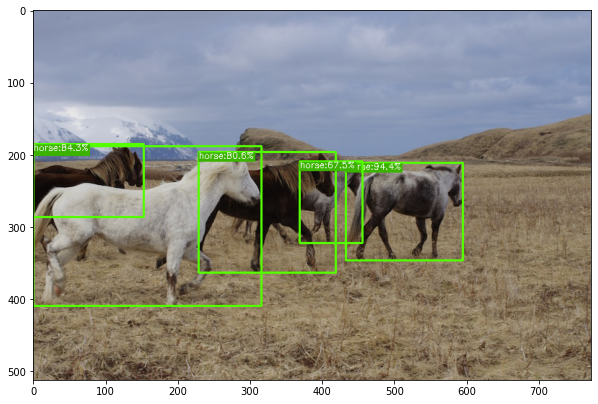

In [17]:

plt.figure(figsize=(10,10))
plt.imshow(origin_img[:, :, ::-1])

## batch 2 .trt inference test

In [18]:
pred = BaseEngine(engine_path='./yolov7_2-py-fp16.trt')
origin_img = pred.inference(img_or_path=False, path='inference/images/horses.jpg')

In [19]:
pred.get_fps()

Average Latency: 0.026073882898781448 ms
Average Throughput: 38.4 ips


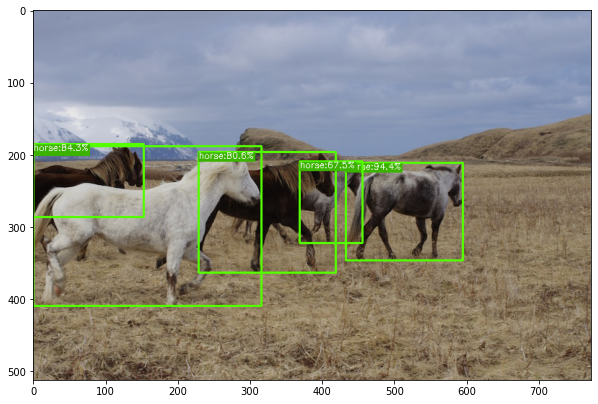

In [17]:
import  matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(origin_img[:, :, ::-1])

# (revised...) batch test

In [5]:
horse = cv2.imread('inference/images/horse.jpg')
bus = cv2.imread('inference/images/bus.jpg')
# zidane = cv2.imread('inference/images/zidane.jpg')

batch_2 = [bus, horse]
# batch_3 = [zidane, bus, horse]

In [6]:
batch_2[0].shape

(1080, 810, 3)

In [186]:
np.asarray(batch_3)

/tmp/xpython_147837/581233056.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.asarray(batch_3).shape


(3,)

## Dataloader by batch 16

In [8]:
import torch
import random
import torch.utils.data as data
import numpy as np
import cv2

def file_load(txt_path):
    
    data_path = []
    f = open(txt_path,'r')
    while True:
        line = f.readline()
        if not line: break
        data_path.append(line[:-1])
    f.close()
    return data_path

class CoCoDataset(data.Dataset):
    def __init__(self, txt_path):
        super(CoCoDataset, self).__init__()
        random.shuffle
#         """
#         opt_data : 'train', 'validation'
        
#         """
        self.file_list = file_load(txt_path)
        # y = pd.read_csv('audio_data/train_answer.csv', index_col=0)
        # self.y = y.values
        
    def __getitem__(self, index):
        
        x = cv2.imread(f'./coco{self.file_list[index][1:]}')
        self.x_data = torch.from_numpy(x).float()
        # self.y_data = torch.from_numpy(self.y[index]).float()
        return self.x_data #, self.y_data

    def __len__(self):
        return len(self.file_list)

In [9]:
coco = CoCoDataset(txt_path='./coco/val2017.txt')
for i, d in enumerate(coco):
    print(d.size())
    if i >= 0:
        break

torch.Size([640, 480, 3])


In [12]:
# drop_last: 마지막 배치는 사용하지 말자.
test_loader = data.DataLoader(dataset=coco, batch_size=16, drop_last=True,collate_fn=_collate_fn)

In [11]:
# we need select the way to prevent dynamic input size from raising error
## 1.padding
## 2.resize

def _collate_fn(batch):
    
    """
    Args:
        batch: list, len(batch) = 16.
    Returns:
        x_tensor : B, C, H, W ; tensor
        
    ex)
    torch.Size([640, 480, 3])
    torch.Size([479, 640, 3])
    """
    x_tensor=[]
    y_tensor=[]
    for img in batch:
        img = np.asarray(img)
        img = cv2.resize(img, (640, 480), cv2.INTER_CUBIC)
        x = torch.from_numpy(img)
        x_tensor.append(x)
 
    return x_tensor

In [29]:


def padding(img, set_size):
    
    '''
    set_size : tuple, (width, height)
    '''
    
#     try:
#         h,w,c=img.shape
#     except:
#         print('파일 확인 후 다시 시작하세요.')
#         raise
        
#     if h < w:
#         new_width = set_size[0]
#         new_height = int(new_width * (h/w))
#     else:
#         new_height = set_size[1]
#         new_width = int(new_height * (w/h))

#     if max(h, w) < set_size:
#         img = cv2.resize(img, (new_width, new_height), cv2.INTER_CUBIC)
#     else:
#         img = cv2.resize(img, (new_width, new_height), cv2.INTER_AREA)

    try:
        h,w,c = img.shape
    except:
        print('파일을 확인후 다시 시작하세요.')
        raise

    delta_w = set_size[0] - w
    delta_h = set_size[1] - h
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    new_img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

    return new_img

In [13]:
for i, batch in enumerate(test_loader):
    print(len(batch))
    if i >= 0:
        break

16


## batch 16 .trt inference test 

In [15]:
pred = BaseEngine(engine_path='./yolov7-tiny_16_2-fp16-nms.trt')
for i, batch in enumerate(test_loader):
    data = pred.infer(batch)
    if i >= 0:
        break
pred.get_fps()

Average Latency: 0.040363608908373864 ms
Average Throughput: 24.8 ips


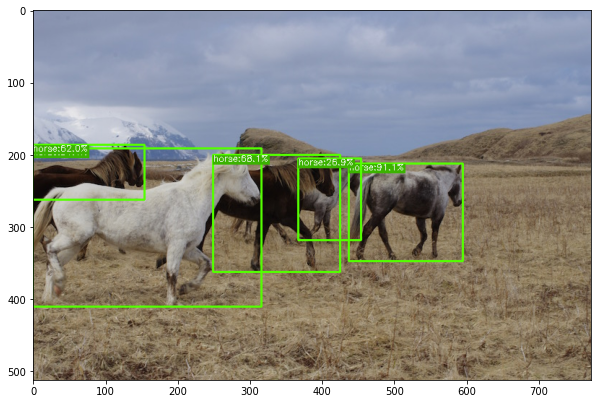

In [26]:

import  matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(origin_img[:, :, ::-1])

In [11]:
pred.get_fps()

Average Latency: 0.04152785697951913 ms
Average Throughput: 24.1 ips


-------

## Appendix
    - how to run trt engine in the way of multi threading?

In [ ]:
from polygraphy.backend.common import BytesFromPath
from polygraphy.backend.trt import TrtRunner, EngineFromBytes

build_engine = EngineFromBytes(BytesFromPath("/path/to/engine"))

with build_engine() as engine, TrtRunner(engine) as r0, TrtRunner(engine) as r1:
    t1 = threading.Thread(r0.infer, args=({"inp_name": image0}, ))
    t2 = threading.Thread(r1.infer, args=({"inp_name": image1}, ))
    t1.start()
    t2.start()
    t2.join()
    t2.join()